In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [4]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [5]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [6]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [7]:
df['wheelbase'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [8]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [9]:
df=df.drop(['CarName','aspiration'],axis=1)

In [10]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.shape

(205, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

car_ID              0
symboling           0
fueltype            0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df['car_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [17]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [18]:
df['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [19]:
df['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

In [20]:
df

,car_ID,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: xlabel='fueltype', ylabel='count'>

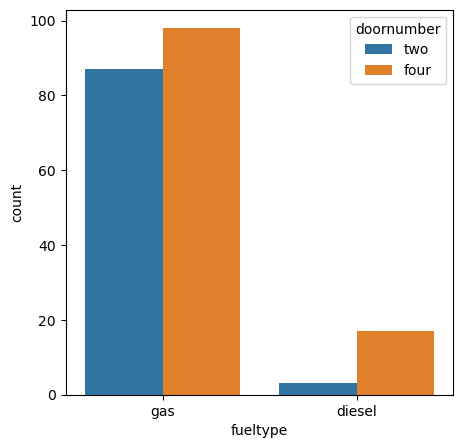

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['fueltype'],hue=df['doornumber'])

<Axes: xlabel='enginetype', ylabel='count'>

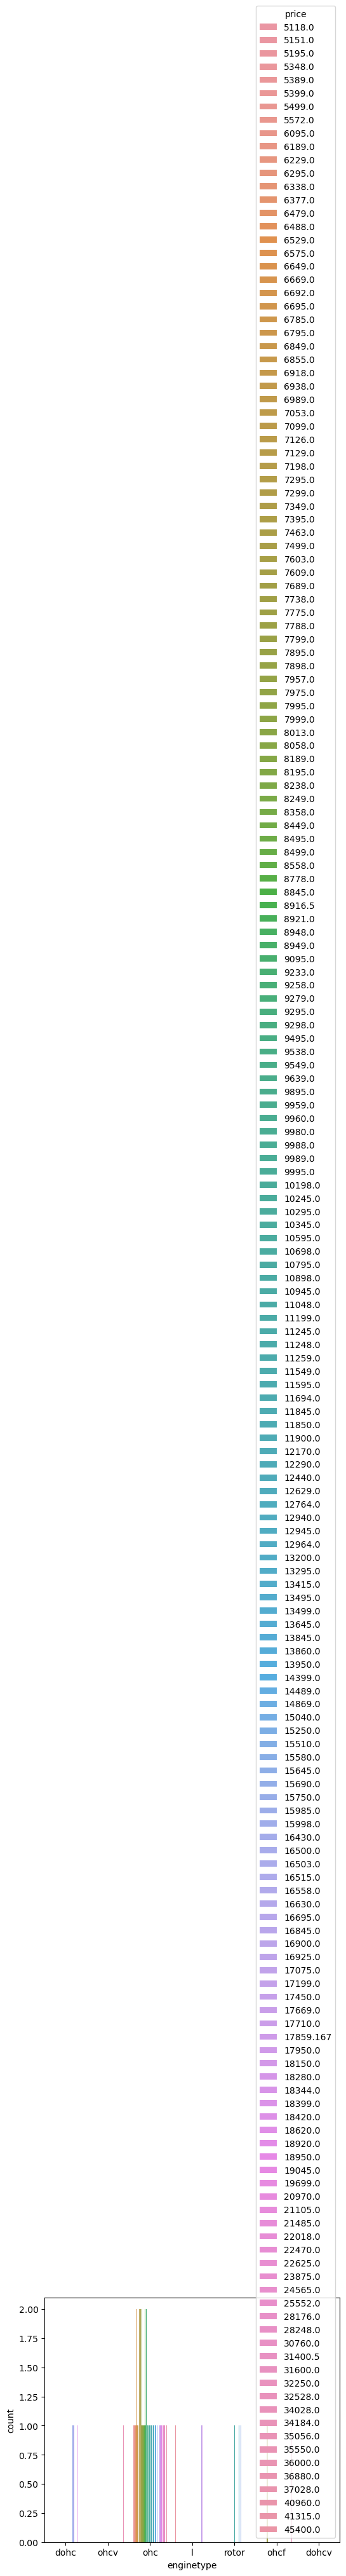

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['enginetype'],hue=df['price'])

In [23]:
x=df.drop(["price"],axis=1)
y=df[["price"]]

In [24]:
df.head(6)

,car_ID,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,gas,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33)

In [27]:
y_train.shape

(137, 1)

In [28]:
transformers=ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),['fueltype','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])],remainder='passthrough')

In [29]:
x_train_new=transformers.fit_transform(x_train)

In [30]:
x_train_new.shape

(137, 41)

In [31]:
x_test_new=transformers.transform(x_test)

In [32]:
x_test_new.shape

(68, 41)

In [33]:
y_train_new=y_train.to_numpy()

In [34]:
y_train_new.shape

(137, 1)

In [35]:
y_test_new=y_test.to_numpy()

In [36]:
y_test_new.shape

(68, 1)

In [37]:
from sklearn.metrics import r2_score

In [38]:
y_train_new

array([[37028.   ],
       [12629.   ],
       [ 7603.   ],
       [ 5118.   ],
       [ 8238.   ],
       [13295.   ],
       [ 8949.   ],
       [35550.   ],
       [ 9895.   ],
       [ 9495.   ],
       [11248.   ],
       [10898.   ],
       [13845.   ],
       [ 6095.   ],
       [ 5572.   ],
       [ 7995.   ],
       [12945.   ],
       [ 6795.   ],
       [ 7775.   ],
       [ 7898.   ],
       [11694.   ],
       [ 6669.   ],
       [ 9989.   ],
       [36880.   ],
       [ 8778.   ],
       [18280.   ],
       [15998.   ],
       [11595.   ],
       [18150.   ],
       [16845.   ],
       [ 6938.   ],
       [ 8558.   ],
       [ 6488.   ],
       [30760.   ],
       [10945.   ],
       [21105.   ],
       [17450.   ],
       [22625.   ],
       [ 9295.   ],
       [13860.   ],
       [ 6855.   ],
       [13495.   ],
       [17710.   ],
       [34028.   ],
       [ 5389.   ],
       [ 6785.   ],
       [ 6479.   ],
       [28248.   ],
       [13950.   ],
       [12440.   ],


In [39]:
x_train_new

array([[1.00e+00, 1.00e+00, 0.00e+00, ..., 5.90e+03, 1.70e+01, 2.50e+01],
       [1.00e+00, 1.00e+00, 0.00e+00, ..., 5.00e+03, 1.90e+01, 2.40e+01],
       [1.00e+00, 1.00e+00, 0.00e+00, ..., 4.40e+03, 2.60e+01, 3.10e+01],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 4.50e+03, 1.40e+01, 1.60e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 4.65e+03, 3.60e+01, 4.20e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 5.40e+03, 2.40e+01, 2.80e+01]])

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [41]:
model.fit(x_train_new,y_train_new)

LinearRegression()

In [42]:
y_pred=model.predict(x_test_new)

In [43]:
y_pred

array([[16308.59765625],
       [ 8081.80859375],
       [ 9398.390625  ],
       [38173.4140625 ],
       [19958.203125  ],
       [ 7969.46484375],
       [10505.68359375],
       [19313.30078125],
       [ 6231.68359375],
       [ 7888.671875  ],
       [22659.72265625],
       [ 7639.30078125],
       [ 8527.33984375],
       [15693.69921875],
       [ 5716.1796875 ],
       [ 6630.40234375],
       [21676.51171875],
       [16424.32421875],
       [24026.015625  ],
       [ 5693.11328125],
       [ 6376.11328125],
       [ 7940.19921875],
       [14314.1953125 ],
       [ 5733.55859375],
       [13419.4765625 ],
       [20155.55859375],
       [ 5948.0390625 ],
       [11394.27734375],
       [15899.05859375],
       [14153.70703125],
       [14542.375     ],
       [11548.9296875 ],
       [11954.3828125 ],
       [14144.640625  ],
       [ 5905.96484375],
       [ 7315.35546875],
       [16765.1640625 ],
       [ 7566.78515625],
       [12444.79296875],
       [ 6381.05078125],


In [44]:
r2_score(y_test_new,y_pred)*100

77.63776058307667